Score over time: 0.513
Final Q-Table Values
[[4.89689741e-01 1.82699656e-03 3.20167171e-03 1.07897423e-02]
 [1.43604155e-03 0.00000000e+00 6.92096396e-03 5.34289558e-01]
 [4.71692068e-01 2.76533552e-03 4.69626722e-04 1.31235734e-03]
 [3.42961008e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [4.88973309e-01 2.16809114e-03 4.95267470e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.63716466e-04 2.82365106e-08 3.22603609e-01 5.49797864e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 7.79587857e-03 1.26421834e-03 5.07847408e-01]
 [0.00000000e+00 7.27168003e-01 3.10811140e-03 0.00000000e+00]
 [2.35722030e-01 4.29415629e-04 1.89176164e-04 1.40842809e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.00290419e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.33769886e-01]
 [0.0000000

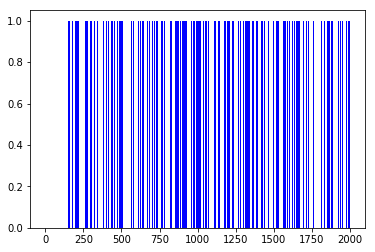

In [3]:
# https://medium.com/emergent-future/simple-reinforcement-learning-with-tensorflow-part-0-q-learning-with-tables-and-neural-networks-d195264329d0#.pjz9g59ap

import gym
from gym import wrappers

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


env = gym.make('FrozenLake-v0')
#env = wrappers.Monitor(env, "gym-results")

action_space_n = 4
state_space_n = 16

# Initialize table with all zeros
Q = np.zeros([state_space_n, action_space_n])

# Set learning parameters
learning_rate = .85
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        # Choose an action by greedily (with noise) picking from Q table
        action = np.argmax(Q[state, :] + np.random.randn(1,
                                                         action_space_n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1 - learning_rate) * Q[state, action] + learning_rate * (reward + dis * np.max(Q[new_state, :]))

        rAll += reward
        state = new_state

    rList.append(rAll)

#env.close()
#gym.upload("gym-results", api_key="sk_VT2wPcSSOylnlPORltmQ")

print("Score over time: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()
